In [1]:
import sys
sys.path.append('/home/av555/iclr/')

In [2]:
from architectures import *
from trainer import *
from loaders import *
from models import *
from utils import *

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch

In [4]:
def load_model(path, model):

    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']

    model.eval()
    return model, epoch, loss


In [5]:
def eval_model(model, val_loader):
    preds = []
    targets = []

    with torch.no_grad():
        for task in val_loader:
            task["dists"] = task["dists"][0,...]
            out = model(task)
            preds.append(out)
            targets.append(task["y_target"])

    #concat full arrays
    preds = torch.cat(preds, dim = 1)
    targets = torch.cat(targets, dim = 0)

    #To cpu
    preds = preds.cpu().numpy()
    targets = targets.cpu().numpy()

    return preds, targets

In [6]:
def get_val_stats_bs(predictions, targets):
        

        maes = np.zeros(predictions.shape[1])
        spearmans = np.zeros(predictions.shape[1])
        pearsons = np.zeros(predictions.shape[1])

        for st in range(predictions.shape[1]):
            # Get station
            true_mean = targets[:, st]
            pred_mean = predictions[:, st,0]
            # Remove nans
            pred_mean = pred_mean[~np.isnan(true_mean)]
            true_mean = true_mean[~np.isnan(true_mean)]

            try:
                maes[st] = np.mean(np.abs(true_mean - pred_mean))
                pearsons[st] = scipy.stats.pearsonr(pred_mean, true_mean)[0]
                spearmans[st] = scipy.stats.spearmanr(pred_mean, true_mean).correlation
            except:
                maes[st] = np.nan
                pearsons[st] = np.nan
                spearmans[st] = np.nan
                continue
        print("Mean absolute error: {}".format(np.nanmedian(maes)))
        print("Pearson correlation: {}".format(np.nanmedian(pearsons)))
        print("Spearman correlation: {}".format(np.nanmedian(spearmans)))

In [7]:
use_cpu = True
device = torch.device('cpu') if use_cpu else torch.device('cuda')

In [8]:
# data
val_ds = ValueExperimentDataset86("/home/av555/iclr/data/", device=device, train=False)
val_loader = DataLoader(
    val_ds, batch_size = 16, shuffle = False)

## convCNP

In [9]:
!ls iclr/exps/


ls: cannot access iclr/exps/: No such file or directory


In [10]:
exp_path = "/home/av555/iclr/exps/convCNP_value_86/"
losses = np.load(exp_path+"losses.npy")

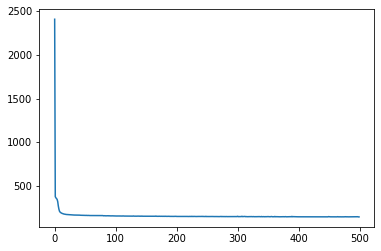

In [11]:
plt.plot(losses)

In [12]:
np.argmin(losses)


498

In [13]:
losses[498]

148.12049018012152

In [14]:
!ls /home/av555/iclr/exps_no_distance_scaling/convCNP_value_86

epoch_1   epoch_13  epoch_17  epoch_20	epoch_24  epoch_3  epoch_7
epoch_10  epoch_14  epoch_18  epoch_21	epoch_25  epoch_4  epoch_8
epoch_11  epoch_15  epoch_19  epoch_22	epoch_26  epoch_5  epoch_9
epoch_12  epoch_16  epoch_2   epoch_23	epoch_27  epoch_6


In [15]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps/convCNP_value_86/epoch_498"
concnp_model = convCNP(
    in_channels=25)

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

/home/av555/iclr/loaders.py:190: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  y_context = torch.from_numpy(self.y_context[index,...]).float()


Mean absolute error: 1.0581230521202087
Pearson correlation: 0.9862988924541032
Spearman correlation: 0.9874473434055733


## convGNP linear

In [19]:
exp_path = "/home/av555/iclr/exps/convGNP_linear_value_86/"
losses = np.load(exp_path+"losses.npy")

In [20]:
np.argmin(losses)


457

In [21]:
losses[498]

132.18209733408744

In [22]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps/convGNP_linear_value_86/epoch_457"
concnp_model = convGNPLinear()

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

Mean absolute error: 1.0319218039512634
Pearson correlation: 0.9868675824179771
Spearman correlation: 0.9877562606674604


## convGNP - kvv

In [23]:
exp_path = "/home/av555/iclr/exps/convGNP_kvv_value_86/"
losses = np.load(exp_path+"losses.npy")

In [24]:
np.argmin(losses)

492

In [25]:
losses[492]

131.47229939049623

In [33]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps/convGNP_kvv_value_86/epoch_492"
concnp_model = convGNPLinear()

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

Mean absolute error: 16.688918113708496
Pearson correlation: 0.30388085787009955
Spearman correlation: 0.32431356901274866


## convNP

In [9]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convNP_value_86/"
losses = np.load(exp_path+"losses.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/home/av555/iclr/exps_no_distance_scaling/convNP_value_86/losses.npy'

In [ ]:
np.argmin(losses)

In [18]:
!ls /home/av555/iclr/exps_convNP/convNP_value_86/

epoch_1    epoch_15   epoch_207  epoch_277  epoch_353  epoch_435  epoch_7
epoch_10   epoch_152  epoch_208  epoch_279  epoch_36   epoch_44   epoch_70
epoch_100  epoch_156  epoch_21	 epoch_28   epoch_365  epoch_45   epoch_72
epoch_105  epoch_16   epoch_210  epoch_285  epoch_378  epoch_452  epoch_73
epoch_11   epoch_161  epoch_217  epoch_29   epoch_38   epoch_468  epoch_74
epoch_110  epoch_162  epoch_22	 epoch_296  epoch_381  epoch_49   epoch_8
epoch_117  epoch_17   epoch_230  epoch_3    epoch_4    epoch_5	  epoch_82
epoch_12   epoch_170  epoch_237  epoch_30   epoch_40   epoch_50   epoch_83
epoch_126  epoch_172  epoch_239  epoch_307  epoch_406  epoch_54   epoch_87
epoch_13   epoch_18   epoch_25	 epoch_31   epoch_409  epoch_55   epoch_9
epoch_131  epoch_190  epoch_250  epoch_316  epoch_41   epoch_6	  epoch_90
epoch_14   epoch_194  epoch_26	 epoch_32   epoch_42   epoch_61   epoch_91
epoch_140  epoch_2    epoch_261  epoch_323  epoch_424  epoch_63   epoch_96
epoch_142  epoch_20   epoch_265  e

In [12]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps_convNP/convNP_value_86/epoch_468"
concnp_model = convNP(
    ls = 0.02,
    n_samples=24,
    n_latent_vars=32)

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)


In [13]:
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)


/home/av555/iclr/loaders.py:190: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  y_context = torch.from_numpy(self.y_context[index,...]).float()


In [14]:
def get_val_stats_bs_convNP(predictions, targets): 

        maes = np.zeros(predictions.shape[2])
        spearmans = np.zeros(predictions.shape[2])
        pearsons = np.zeros(predictions.shape[2])

        for st in range(predictions.shape[2]):
            # Get station
            true_mean = targets[:, st]
            pred_mean = predictions[:,:, st,0]

            # Remove nans
            pred_mean = pred_mean[:,~np.isnan(true_mean)]
            true_mean = true_mean[~np.isnan(true_mean)]

            try:
                maes[st] = np.mean(np.abs(true_mean - pred_mean))
            except:
                maes[st] = np.nan
                continue
        print("Mean absolute error: {}".format(np.nanmedian(maes)))
        


In [15]:
get_val_stats_bs_convNP(convcnp_preds, convcnp_targets)

Mean absolute error: 1.0800406336784363


In [16]:
convcnp_preds.shape

(24, 2192, 86, 2)

In [17]:
convcnp_targets.shape

(2192, 86)

In [11]:
# Get log lik
for i in range(24):
    p = convcnp_preds[0,...]
    
    

epoch_1    epoch_15   epoch_207  epoch_277  epoch_353  epoch_435  epoch_7
epoch_10   epoch_152  epoch_208  epoch_279  epoch_36   epoch_44   epoch_70
epoch_100  epoch_156  epoch_21	 epoch_28   epoch_365  epoch_45   epoch_72
epoch_105  epoch_16   epoch_210  epoch_285  epoch_378  epoch_452  epoch_73
epoch_11   epoch_161  epoch_217  epoch_29   epoch_38   epoch_468  epoch_74
epoch_110  epoch_162  epoch_22	 epoch_296  epoch_381  epoch_49   epoch_8
epoch_117  epoch_17   epoch_230  epoch_3    epoch_4    epoch_5	  epoch_82
epoch_12   epoch_170  epoch_237  epoch_30   epoch_40   epoch_50   epoch_83
epoch_126  epoch_172  epoch_239  epoch_307  epoch_406  epoch_54   epoch_87
epoch_13   epoch_18   epoch_25	 epoch_31   epoch_409  epoch_55   epoch_9
epoch_131  epoch_190  epoch_250  epoch_316  epoch_41   epoch_6	  epoch_90
epoch_14   epoch_194  epoch_26	 epoch_32   epoch_42   epoch_61   epoch_91
epoch_140  epoch_2    epoch_261  epoch_323  epoch_424  epoch_63   epoch_96
epoch_142  epoch_20   epoch_265  e